In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
import os
import cv2

path = 'C:/Users/Aspire_Lays/Desktop/ML_assignments/Lab9/Training'
classes = {'notumor': 0, 'pituitary': 1,'glioma':2,'meningioma':3}
X = []
Y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

In [7]:
X = np.array(X)
Y = np.array(Y)

In [8]:
pd.Series(Y).value_counts()

0    1595
1    1457
3    1339
2    1321
Name: count, dtype: int64

In [9]:
X_updated = X.reshape(len(X), -1)

In [10]:
X.shape, X_updated.shape

((5712, 200, 200), (5712, 40000))

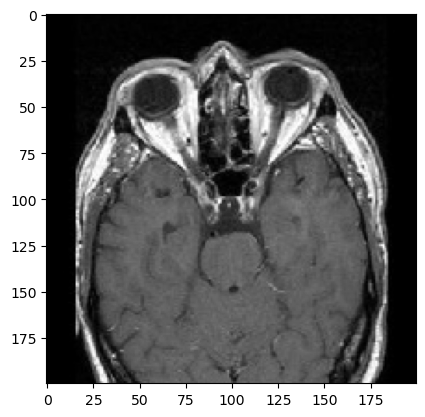

In [11]:
plt.imshow(X[0], cmap='gray')

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [13]:
xtrain.shape, xtest.shape

((4569, 40000), (1143, 40000))

In [14]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [15]:
from sklearn.svm import SVC

In [16]:
sv = SVC(kernel='linear')
sv.fit(xtrain,ytrain)

SVC(kernel='linear')

In [17]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8713910761154856


In [18]:
pred = sv.predict(xtest)

In [19]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  12,   18,   33,   57,   58,   78,   82,   98,  101,  108,  110,
         115,  116,  120,  131,  137,  143,  180,  189,  194,  198,  205,
         208,  211,  212,  226,  240,  244,  258,  264,  277,  289,  290,
         291,  293,  313,  317,  322,  325,  343,  346,  348,  369,  376,
         395,  399,  404,  418,  429,  436,  439,  442,  445,  448,  454,
         458,  461,  466,  480,  493,  505,  512,  515,  519,  548,  553,
         555,  574,  580,  582,  594,  598,  600,  604,  606,  611,  615,
         617,  620,  646,  648,  650,  651,  663,  664,  667,  669,  677,
         679,  692,  697,  700,  709,  711,  716,  718,  721,  722,  730,
         733,  741,  745,  751,  766,  767,  769,  780,  790,  800,  823,
         840,  853,  863,  894,  896,  907,  915,  933,  949,  956,  971,
         981,  984,  999, 1023, 1025, 1028, 1029, 1037, 1052, 1053, 1060,
        1064, 1065, 1066, 1071, 1072, 1086, 1093, 1096, 1104, 1105, 1116,
        1118, 1131, 1132, 1142], dtype

In [28]:
dec = {0: 'notumor', 1: 'pituitary',2:'glioma',3: 'meningioma'}

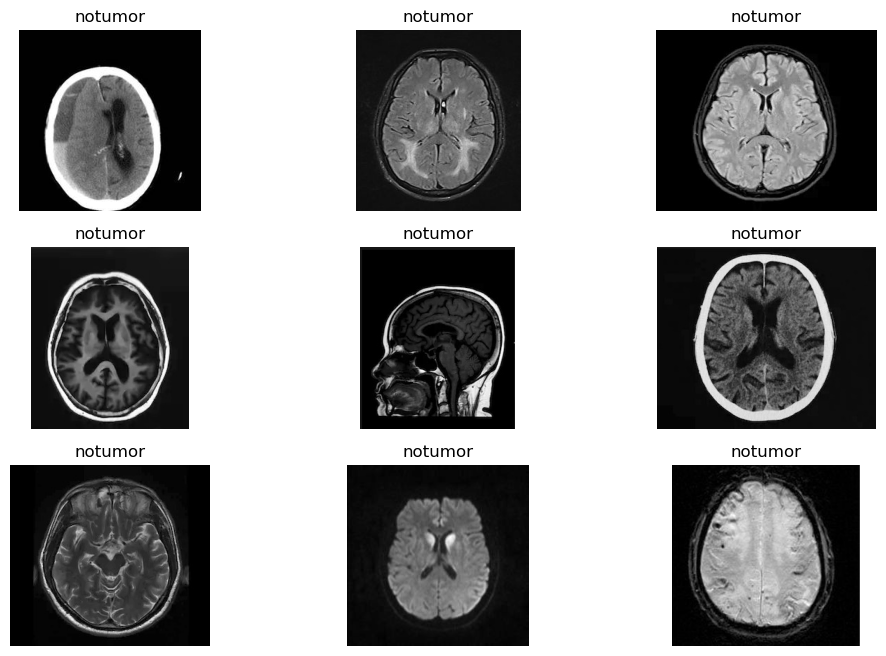

In [29]:
plt.figure(figsize=(12,8))
c=1
path='C:/Users/Aspire_Lays/Desktop/ML_assignments/Lab9/Testing/notumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'Unknown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

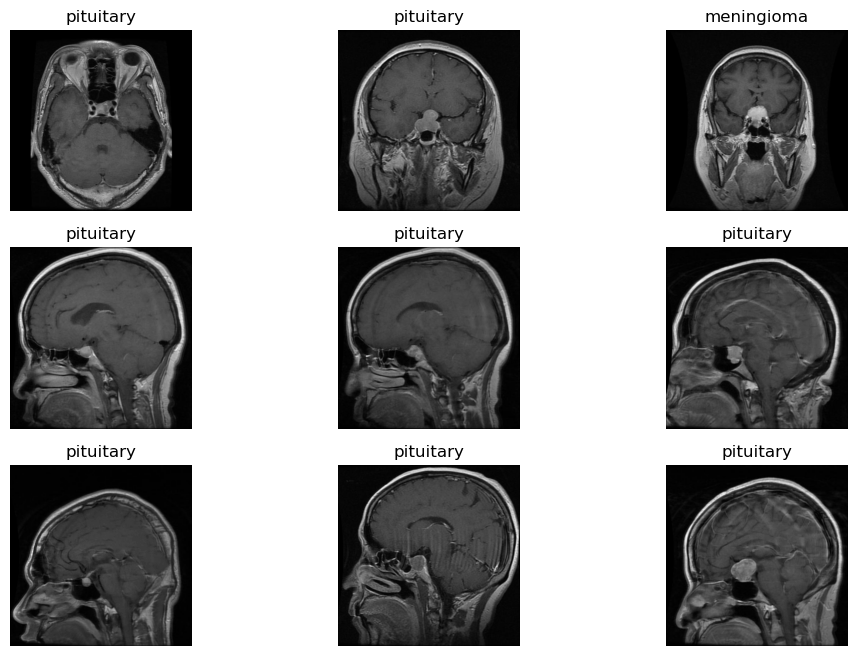

In [30]:
plt.figure(figsize=(12,8))
c=1
path='C:/Users/Aspire_Lays/Desktop/ML_assignments/Lab9/Testing/pituitary'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'Unknown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

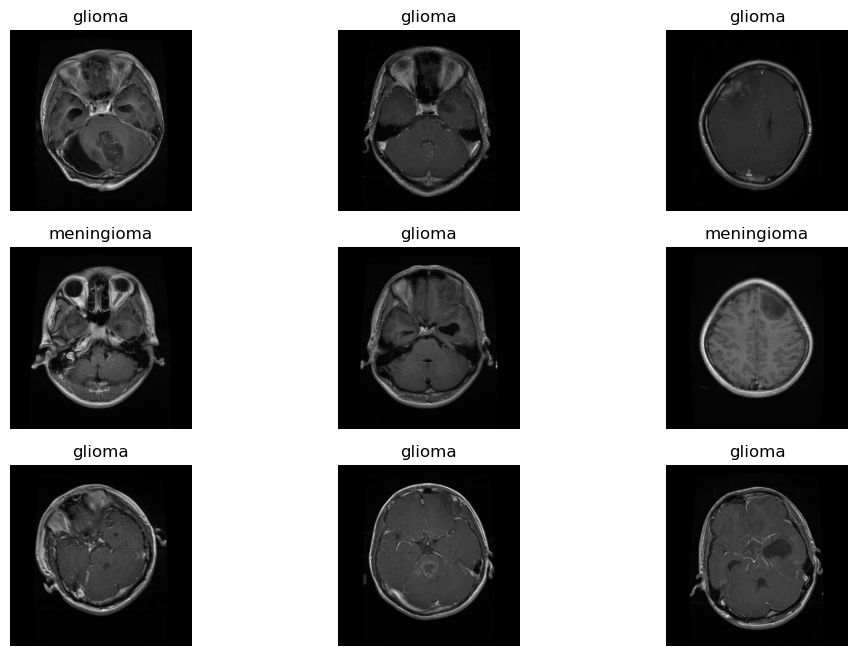

In [31]:
plt.figure(figsize=(12,8))
c=1
path='C:/Users/Aspire_Lays/Desktop/ML_assignments/Lab9/Testing/glioma'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'Unknown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

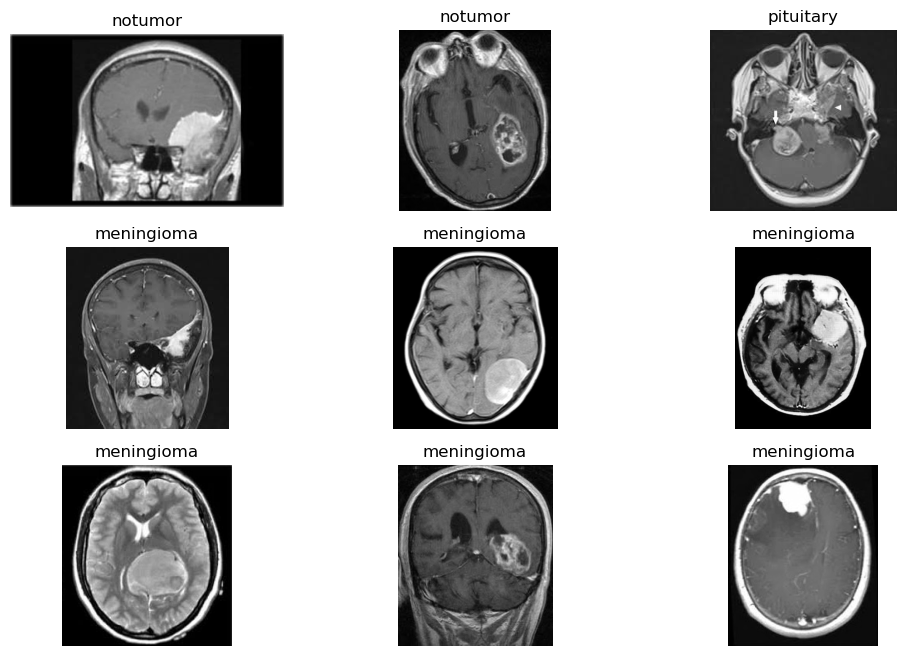

In [32]:
plt.figure(figsize=(12,8))
c=1
path='C:/Users/Aspire_Lays/Desktop/ML_assignments/Lab9/Testing/meningioma'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'Unknown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()